<a href="https://colab.research.google.com/github/harshavardhangadila/Training-Neural-networks-with-Keras/blob/main/Part%201/C_Earlystopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import matplotlib.pyplot as plt
import numpy as np

# Set random seed
tf.random.set_seed(42)


In [2]:
# Load dataset
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize to [0, 1]
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Expand dims for Conv2D
x_train_full = np.expand_dims(x_train_full, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Subset the data: 4500 for training, 500 for validation
x_train, y_train = x_train_full[:4500], y_train_full[:4500]
x_val, y_val = x_train_full[4500:5000], y_train_full[4500:5000]

print("Training samples:", x_train.shape)
print("Validation samples:", x_val.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (4500, 28, 28, 1)
Validation samples: (500, 28, 28, 1)


In [3]:
# Function to create a base CNN model
def build_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [4]:
# Train for a fixed number of epochs
model_fixed = build_model()

history_fixed = model_fixed.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=64,
    verbose=2
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
71/71 - 7s - 96ms/step - accuracy: 0.6602 - loss: 0.9373 - val_accuracy: 0.8240 - val_loss: 0.4821
Epoch 2/30
71/71 - 5s - 75ms/step - accuracy: 0.8100 - loss: 0.5328 - val_accuracy: 0.8580 - val_loss: 0.4083
Epoch 3/30
71/71 - 1s - 9ms/step - accuracy: 0.8391 - loss: 0.4404 - val_accuracy: 0.8660 - val_loss: 0.3773
Epoch 4/30
71/71 - 1s - 8ms/step - accuracy: 0.8578 - loss: 0.3885 - val_accuracy: 0.8840 - val_loss: 0.3447
Epoch 5/30
71/71 - 0s - 4ms/step - accuracy: 0.8711 - loss: 0.3500 - val_accuracy: 0.8920 - val_loss: 0.3107
Epoch 6/30
71/71 - 0s - 5ms/step - accuracy: 0.8856 - loss: 0.3148 - val_accuracy: 0.9020 - val_loss: 0.2963
Epoch 7/30
71/71 - 1s - 9ms/step - accuracy: 0.9016 - loss: 0.2792 - val_accuracy: 0.9080 - val_loss: 0.2757
Epoch 8/30
71/71 - 1s - 8ms/step - accuracy: 0.9102 - loss: 0.2596 - val_accuracy: 0.8980 - val_loss: 0.2717
Epoch 9/30
71/71 - 1s - 8ms/step - accuracy: 0.9187 - loss: 0.2368 - val_accuracy: 0.8960 - val_loss: 0.2761
Epoch 10/30
71/71

In [5]:
# Use EarlyStopping callback with patience of 3
early_stop_cb = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model_early = build_model()

history_early = model_early.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop_cb],
    verbose=2
)

print("Training stopped after", len(history_early.history['loss']), "epochs (early stopped)")


Epoch 1/30
71/71 - 4s - 62ms/step - accuracy: 0.6656 - loss: 0.9363 - val_accuracy: 0.8180 - val_loss: 0.4731
Epoch 2/30
71/71 - 0s - 5ms/step - accuracy: 0.8031 - loss: 0.5514 - val_accuracy: 0.8480 - val_loss: 0.4047
Epoch 3/30
71/71 - 0s - 6ms/step - accuracy: 0.8384 - loss: 0.4605 - val_accuracy: 0.8760 - val_loss: 0.3504
Epoch 4/30
71/71 - 0s - 5ms/step - accuracy: 0.8558 - loss: 0.4065 - val_accuracy: 0.8900 - val_loss: 0.3215
Epoch 5/30
71/71 - 1s - 8ms/step - accuracy: 0.8693 - loss: 0.3667 - val_accuracy: 0.8920 - val_loss: 0.2999
Epoch 6/30
71/71 - 0s - 5ms/step - accuracy: 0.8796 - loss: 0.3340 - val_accuracy: 0.8940 - val_loss: 0.2894
Epoch 7/30
71/71 - 0s - 5ms/step - accuracy: 0.8911 - loss: 0.3050 - val_accuracy: 0.8940 - val_loss: 0.2777
Epoch 8/30
71/71 - 1s - 9ms/step - accuracy: 0.9004 - loss: 0.2788 - val_accuracy: 0.8980 - val_loss: 0.2721
Epoch 9/30
71/71 - 1s - 9ms/step - accuracy: 0.9082 - loss: 0.2600 - val_accuracy: 0.9000 - val_loss: 0.2577
Epoch 10/30
71/71 

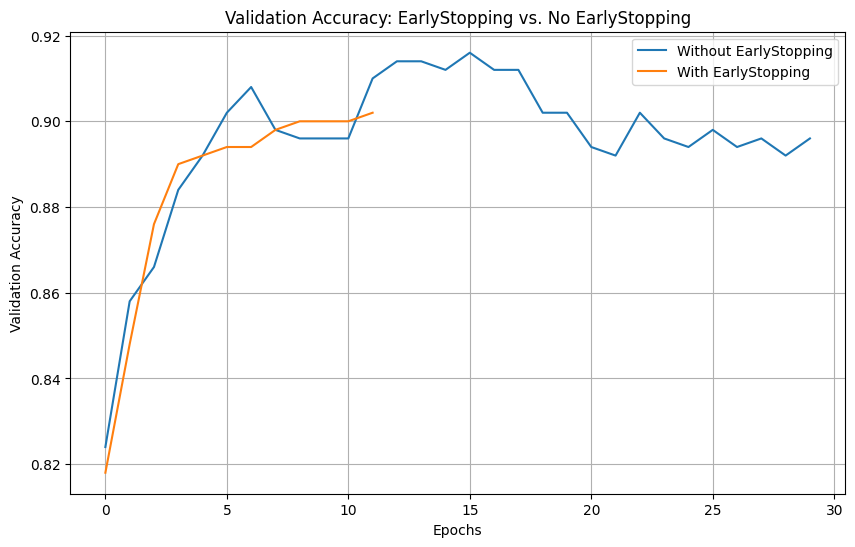

In [6]:
# Compare validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_fixed.history['val_accuracy'], label="Without EarlyStopping")
plt.plot(history_early.history['val_accuracy'], label="With EarlyStopping")
plt.title("Validation Accuracy: EarlyStopping vs. No EarlyStopping")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


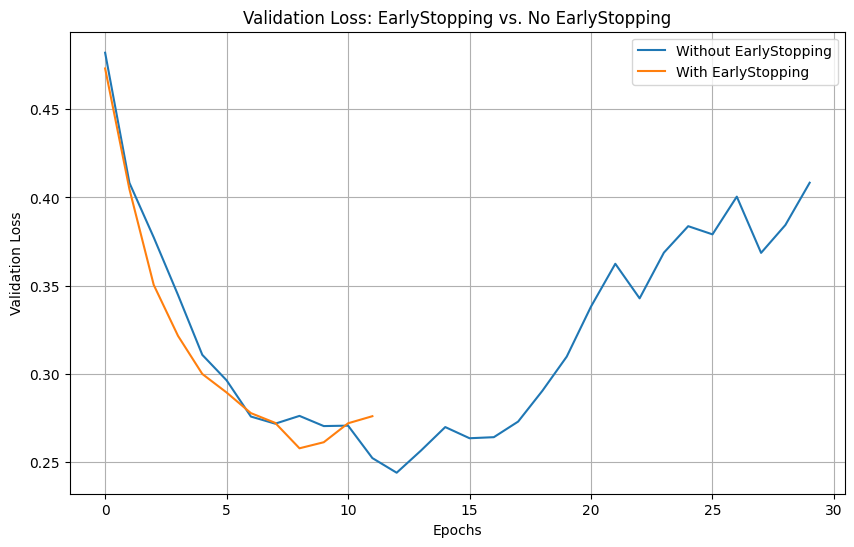

In [7]:
# Compare validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_fixed.history['val_loss'], label="Without EarlyStopping")
plt.plot(history_early.history['val_loss'], label="With EarlyStopping")
plt.title("Validation Loss: EarlyStopping vs. No EarlyStopping")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


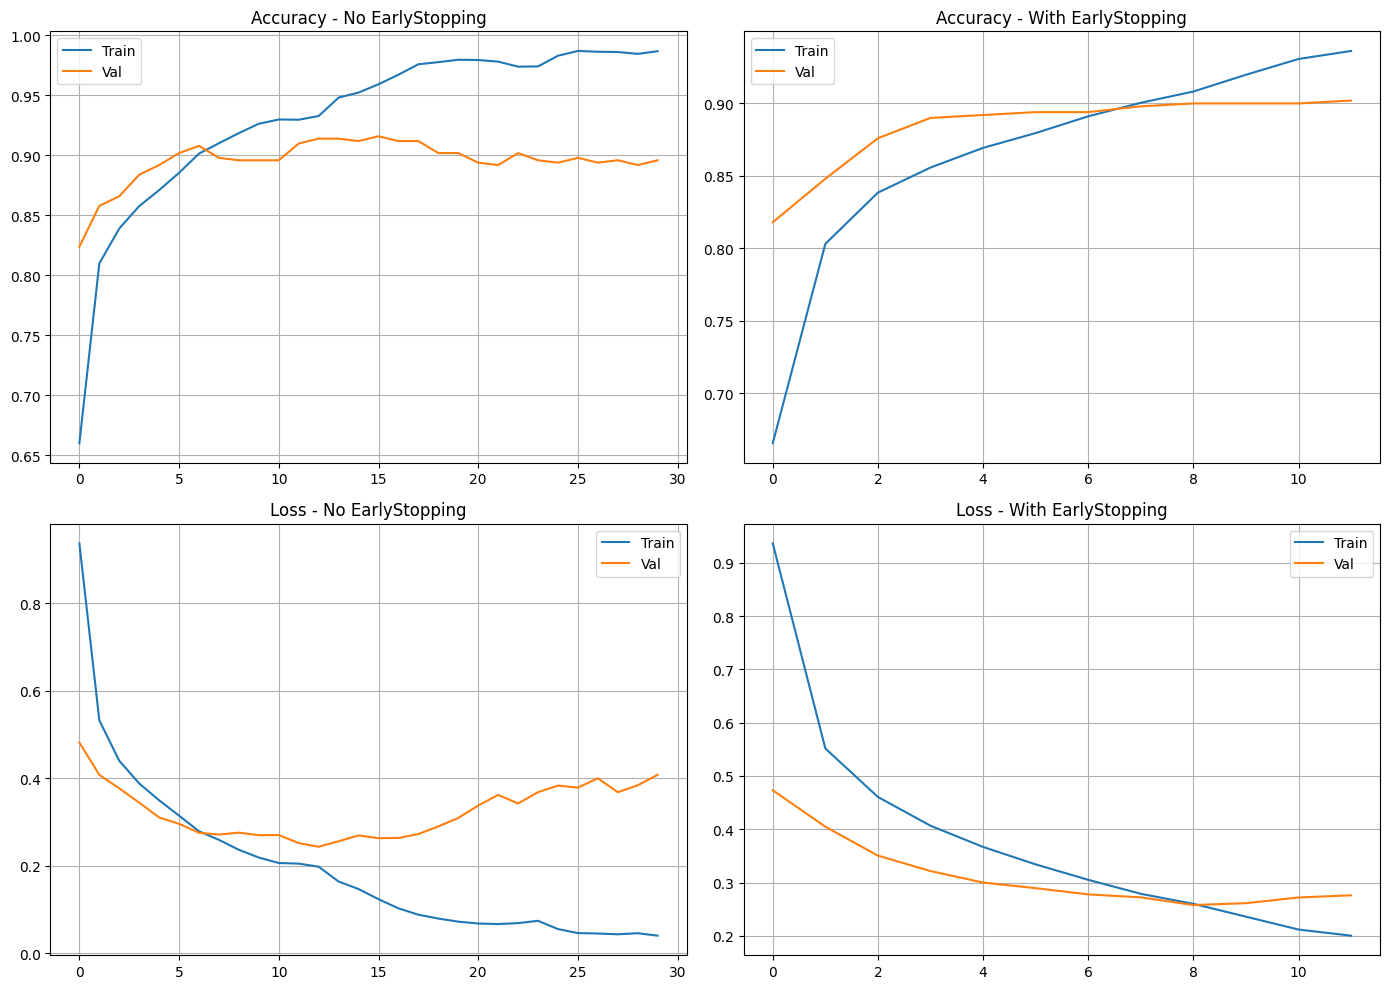

In [8]:
# Plot training and validation metrics for both models
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy - Fixed
axs[0, 0].plot(history_fixed.history['accuracy'], label="Train")
axs[0, 0].plot(history_fixed.history['val_accuracy'], label="Val")
axs[0, 0].set_title("Accuracy - No EarlyStopping")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Accuracy - EarlyStopping
axs[0, 1].plot(history_early.history['accuracy'], label="Train")
axs[0, 1].plot(history_early.history['val_accuracy'], label="Val")
axs[0, 1].set_title("Accuracy - With EarlyStopping")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Loss - Fixed
axs[1, 0].plot(history_fixed.history['loss'], label="Train")
axs[1, 0].plot(history_fixed.history['val_loss'], label="Val")
axs[1, 0].set_title("Loss - No EarlyStopping")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Loss - EarlyStopping
axs[1, 1].plot(history_early.history['loss'], label="Train")
axs[1, 1].plot(history_early.history['val_loss'], label="Val")
axs[1, 1].set_title("Loss - With EarlyStopping")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


In [9]:
# Print epochs trained
print("Fixed model ran for:", len(history_fixed.history['loss']), "epochs")
print("EarlyStopped model ran for:", len(history_early.history['loss']), "epochs")

# Print max val accuracy
print("Best Val Accuracy - No EarlyStopping:", max(history_fixed.history['val_accuracy']))
print("Best Val Accuracy - With EarlyStopping:", max(history_early.history['val_accuracy']))


Fixed model ran for: 30 epochs
EarlyStopped model ran for: 12 epochs
Best Val Accuracy - No EarlyStopping: 0.9160000085830688
Best Val Accuracy - With EarlyStopping: 0.9020000100135803
